# Credit Card Customer Data
A Customer Credit Card Information Dataset which can be used for Identifying Loyal Customers, Customer Segmentation, Targeted Marketing and other such use cases in the Marketing Industry.


## Importing Libraries

In [29]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')

# Loading Data

In [2]:
#/kaggle/input/credit-card-customer-data/Credit Card Customer Data.csv
creditCardData = pd.read_csv('../input/credit_card_customer_data.csv')

In [3]:
creditCardData.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [4]:
creditCardData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [10]:
creditCardData = creditCardData.loc[:, creditCardData.columns!='Sl_No'].set_index('Customer Key')

In [12]:
creditCardData.describe()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000
mean,34574.242424,4.706061,2.403030,2.606061,3.583333
std,37625.487804,2.167835,1.631813,2.935724,2.865317
min,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,48000.000000,6.000000,4.000000,4.000000,5.000000
max,200000.000000,10.000000,5.000000,15.000000,10.000000


array([[<AxesSubplot:title={'center':'Avg_Credit_Limit'}>,
        <AxesSubplot:title={'center':'Total_Credit_Cards'}>],
       [<AxesSubplot:title={'center':'Total_visits_bank'}>,
        <AxesSubplot:title={'center':'Total_visits_online'}>],
       [<AxesSubplot:title={'center':'Total_calls_made'}>,
        <AxesSubplot:>]], dtype=object)

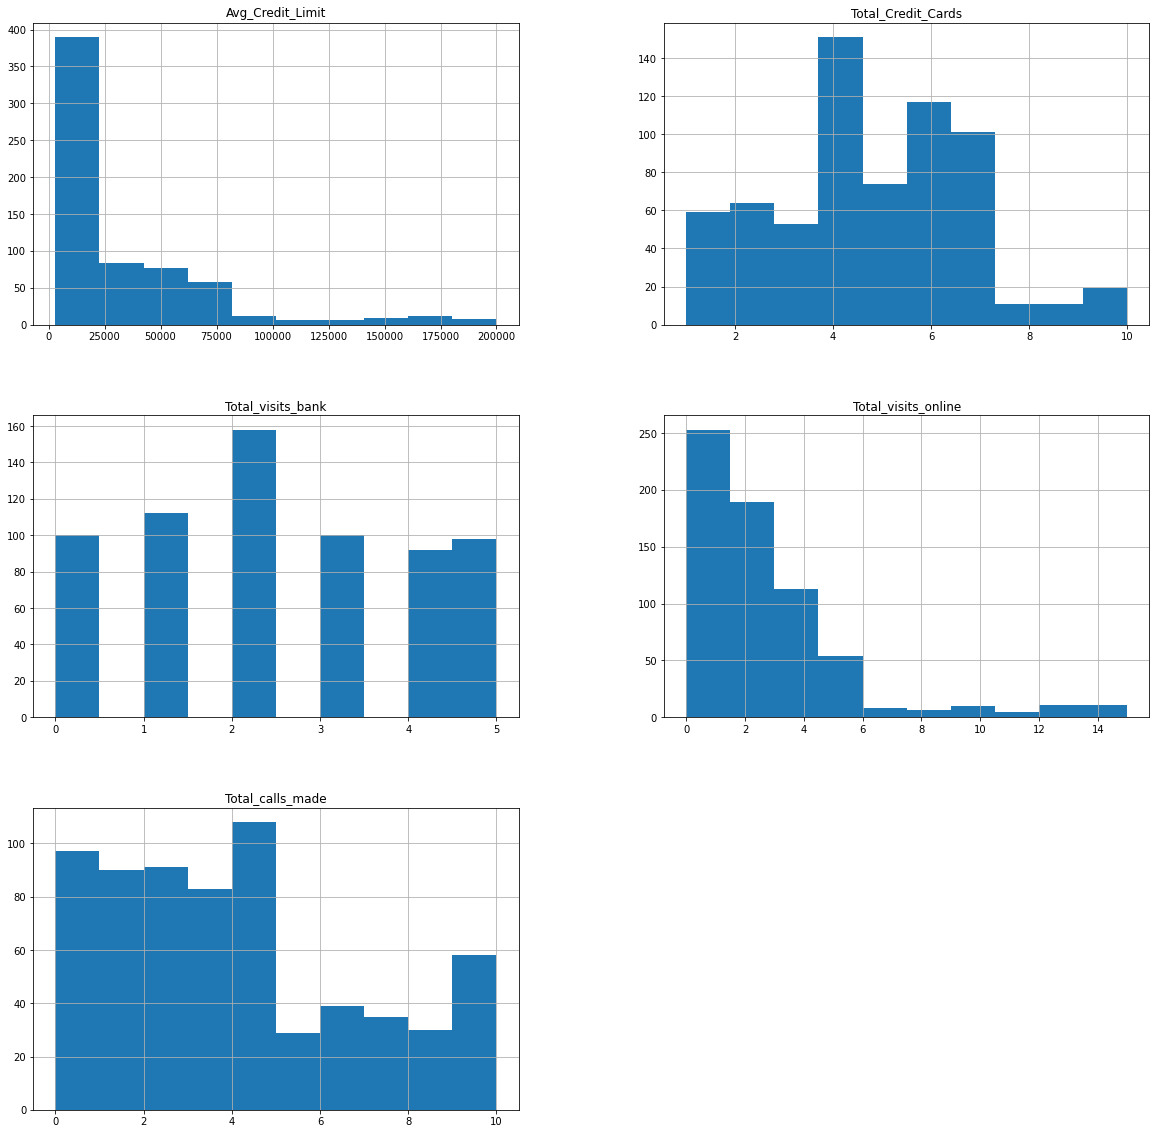

In [13]:
creditCardData.hist(figsize=(20, 20))

# Data Preprocessing
## Standardization

In [90]:
scaler = StandardScaler()
standardData = scaler.fit(creditCardData)
scaledData = pd.DataFrame(scaler.transform(creditCardData),columns= creditCardData.columns )

In [91]:
scaledData.describe()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,6.600000e+02,6.600000e+02,6.600000e+02,6.600000e+02,6.600000e+02
mean,8.195465e-16,-4.006223e-15,1.157323e-16,1.944572e-16,-7.112156e-16
std,1.000758e+00,1.000758e+00,1.000758e+00,1.000758e+00,1.000758e+00
min,-8.398081e-01,-1.710864e+00,-1.473731e+00,-8.883795e-01,-1.251537e+00
25%,-6.536229e-01,-7.875852e-01,-8.604506e-01,-5.474897e-01,-9.022711e-01
50%,-4.408398e-01,1.356941e-01,-2.471705e-01,-2.065999e-01,-2.037386e-01
75%,3.570968e-01,5.973337e-01,9.793898e-01,4.751797e-01,4.947938e-01
max,4.399975e+00,2.443892e+00,1.592670e+00,4.224968e+00,2.241125e+00


In [110]:
pca = PCA(n_components = 3)
XPCAreduced = pca.fit_transform(scaledData)

In [111]:
XPCAreduced

array([[ 0.50129079,  0.52482909,  1.89586173],
       [-1.45956008,  3.10558756, -0.9068019 ],
       [ 0.52579466,  0.82397914,  0.0890302 ],
       ...,
       [ 2.85144378,  2.98308097,  0.0448878 ],
       [ 4.17825796,  4.58293019, -0.60533647],
       [ 3.16042563,  4.35101851, -0.25437735]])

In [112]:
print('Mean vector: ', pca.mean_)
print('Projection: ', pca.components_)
print ('Explained variance ratio: ', pca.explained_variance_ratio_)



Mean vector:  [ 8.61263922e-17  4.30631961e-17 -4.30631961e-17  7.53605932e-17
 -8.61263922e-17]
Projection:  [[ 0.48885901  0.59767943  0.28049227  0.11178284 -0.55912866]
 [ 0.40323959  0.03017103 -0.58658661  0.66516108  0.22352726]
 [ 0.00346147 -0.28498293 -0.6135219  -0.3049481  -0.67035086]]
Explained variance ratio:  [0.45736578 0.37426483 0.06401348]


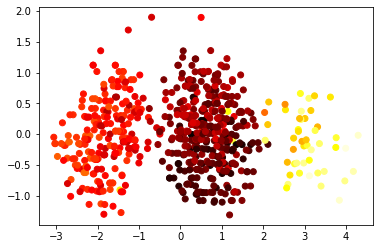

In [113]:
plt.scatter(XPCAreduced[:, 0],  XPCAreduced[:, 2], c=XPCAreduced[:, 1], cmap='hot')